# Problem 1

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import uniform
import math

In [3]:
path = './server_mt-output.txt'
request_lengths = []
sent_tscs = []
with open(path, 'r') as file:
    for line in file:     
        if line[0] == 'R':
            ls = line.split(',')
            sent_tsc = (float)(ls[0].split(':')[1])
            sent_tscs.append(sent_tsc)
            request_len = (float)(ls[1])
            request_lengths.append(request_len)   
            
# print(sent_tscs)

### a)  The distribution plot of request lengths

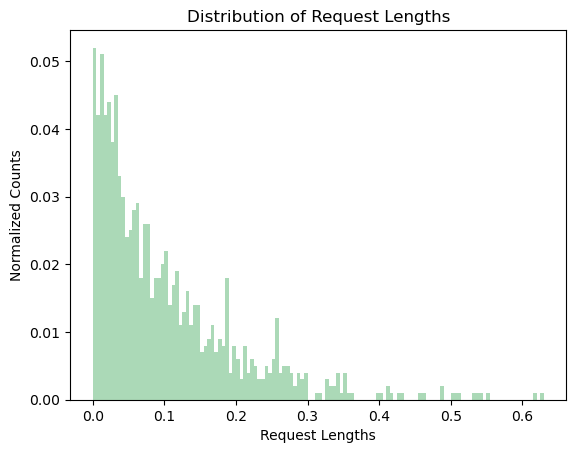

In [4]:
req_lens = np.zeros(1000)
for i in range(0, 1000):
    req_lens[i] = request_lengths[i]


bins_a = np.arange(0, np.max(req_lens)+0.005, 0.005) 
counts_a, _ = np.histogram(req_lens, bins=bins_a)
percentage_counts_a = counts_a / 1000.0
plt.bar(bins_a[:-1], percentage_counts_a, width=0.005, align='edge', alpha=0.7, color = '#88c999')

plt.xlabel('Request Lengths')
plt.ylabel('Normalized Counts')
plt.title('Distribution of Request Lengths')
plt.show()

### b) The distribution plot of inner-arrival time

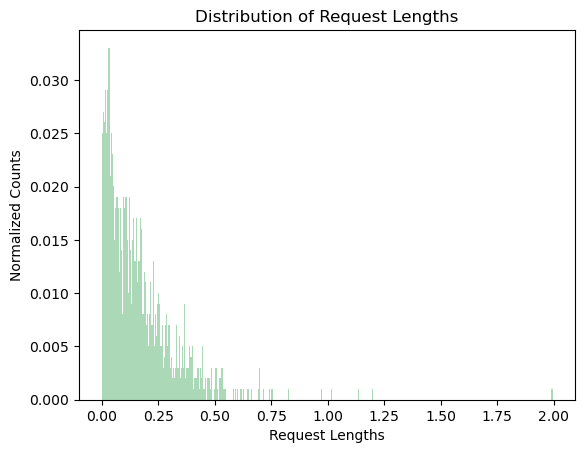

1.992529999999988


In [6]:
inner_times = np.zeros(999)
for i in range(len(sent_tscs)-1):
    inner_time = sent_tscs[i+1] - sent_tscs[i]
    inner_times[i] = inner_time
    
bins_b = np.arange(0, np.max(inner_times)+0.005, 0.005) 
counts_b, _ = np.histogram(inner_times, bins=bins_b)
percentage_counts_b = counts_b / 999.0
plt.bar(bins_b[:-1], percentage_counts_b, width=0.005, align='edge', alpha=0.7, color = '#88c999')

plt.xlabel('Request Lengths')
plt.ylabel('Normalized Counts')
plt.title('Distribution of Request Lengths')
plt.show()
print(np.max(inner_times))
# print(inner_times)

### c) Reverse-engineer

The distribution of request lengths matches the exponential distribution.

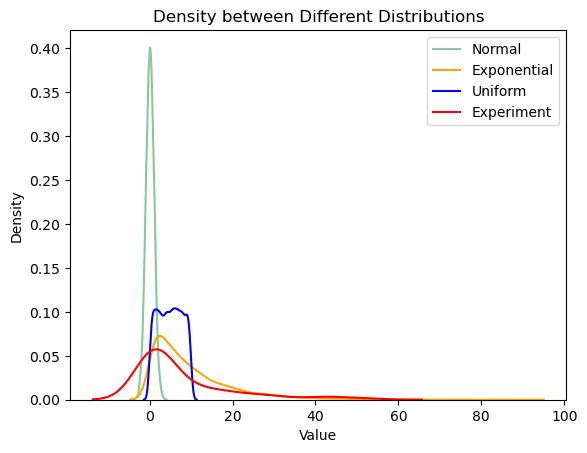

In [7]:
normal_samples = np.random.normal(1/10, 1, 10000)
exponential_samples = np.random.exponential(10, 10000)
uniform_samples = np.random.uniform(0, 10, 10000)

# Use kdeplot to plot the kernel density estimate
sns.kdeplot(normal_samples, color='#88c999', label='Normal')
sns.kdeplot(exponential_samples, color='orange', label='Exponential')
sns.kdeplot(uniform_samples, color='blue', label='Uniform')
sns.kdeplot(counts_a, color='red', label='Experiment')

plt.title("Density between Different Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

### d)

-a parameter controls the number of and -s parameters controls the size of the message the client sends to the server.

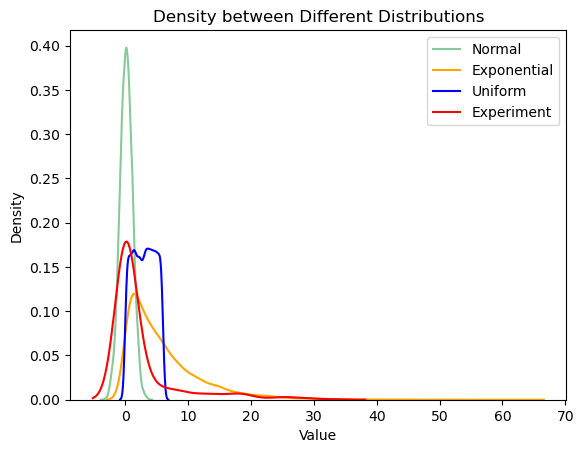

In [8]:
normal_samples = np.random.normal(1/6, 1, 10000)
exponential_samples = np.random.exponential(6, 10000)
uniform_samples = np.random.uniform(0, 6, 10000)

# Use kdeplot to plot the kernel density estimate
sns.kdeplot(normal_samples, color='#88c999', label='Normal')
sns.kdeplot(exponential_samples, color='orange', label='Exponential')
sns.kdeplot(uniform_samples, color='blue', label='Uniform')
sns.kdeplot(counts_b, color='red', label='Experiment')

plt.title("Density between Different Distributions")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.show()

## Problem 2

In [10]:
path = './server_q-output.txt'
# Read the file
with open(path, 'r') as file:
    lines = file.readlines()

# Extract timestamps and queue lengths
timestamps = []
queue_lengths = []

for line in lines:
    if line.startswith("R"):
        parts = line.split(',')
        timestamp = float(parts[0].split(':')[1])
        timestamps.append(timestamp)
        
        # Find the next Q: line
        idx = lines.index(line) + 1
        while not lines[idx].startswith("Q:"):
            idx += 1
        queue = lines[idx].split(':')[1].strip()
        if queue == "[]":
            queue_lengths.append(0)
        else:
            queue_lengths.append(len(queue.split(',')))

# Compute time-weighted average
total_time = timestamps[-1] - timestamps[0]
weighted_sum = 0

for i in range(1, len(timestamps)):
    delta_time = timestamps[i] - timestamps[i-1]
    weighted_sum += queue_lengths[i-1] * delta_time

average_queue_length = weighted_sum / total_time
print("Time-weighted average queue length:", average_queue_length)


Time-weighted average queue length: 7.843221023564421


In [14]:
def get_data(path):
    maxN = 0.0
    minN = 100.0
    mean = 0
    sum = 0
    var = 0
    std = 0
    response_ls = []
    with open(path, 'r') as file:
        for line in file:
            if line.startswith('R'):
                line = line.split(':')[1].split(',')
                response_time = (float)(line[4])-(float)(line[0])
                response_ls.append(response_time)
                sum += response_time

                maxN = max(maxN, response_time)
                minN = min(minN, response_time)
        mean = sum / len(response_ls)

        for t in response_ls:
            var += (t - mean)**2/len(response_ls)
        std = math.sqrt(var)

    return [maxN, minN, mean, std]

def get_reqlen(path):
    req_lens = np.zeros(1000)
    sent_tscs = []
    with open(path, 'r') as file:
        for line in file:     
            if line[0] == 'R':
                ls = line.split(',')
                sent_tsc = (float)(ls[0].split(':')[1])
                sent_tscs.append(sent_tsc)
                request_len = (float)(ls[1])
                req_lens.append(request_len)  
    return [req_lens, sent_tscs]

def get_inner(path, sent_tscs):
    inner_times = np.zeros(999)
    for i in range(len(sent_tscs)-1):
        inner_time = sent_tscs[i+1] - sent_tscs[i]
        inner_times[i] = inner_time

def computer_utilization(path):
    busy_time = 0
    total_time = 0
    with open(path, 'r') as file:
        rowNum = 0
        for line in file:
            if line.startswith('R'):
                line = line.split(':')[1].split(',')
                if rowNum == 0:
                    total_time -= (float)(line[3])
                    # print(f's: {line[3]}')
                elif rowNum == 999:
                    total_time += (float)(line[4])
                    # print(f'e: {line[4]}')
                busy_time += (float)(line[4]) - (float)(line[3])
    return busy_time / total_time

def computer_all_utilization(start_index, end_index):
    all_utilization = []
    for i in range(start_index, end_index+1):
        path = f"./s{i}.txt"
        data = computer_utilization(path)
        all_utilization.append(data)
    return all_utilization

def get_all_response_avg(i, j):
    mean = 0
    all_means = []
    for i in range(i, j+1):
        path = f"./s{i}.txt"
        mean = get_data(path)[2]
        all_means.append(mean)
    return all_means

def get_avg_qlens(i, j):
    all_qlens = []
    for i in range(i, j+1):
        path = f"./s{i}.txt"
        mean = avg_queue(path)
        all_qlens.append(mean)
    return all_qlens

In [15]:
utili = computer_all_utilization(1,15)
# print(utili)
resp_ts = get_all_response_avg(1,15)
# print(resp_ts)
avg_qlens = get_avg_qlens(1, 15)

fig,ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_ylabel('Average Response Time', color=color)
line1, = ax1.plot(utili,resp_ts,marker='o', color=color,label='Average Response Time')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color ='tab:red'
ax2.set_ylabel('Average Queue Size',color=color)
line2, = ax2.plot(utili,avg_qlens, marker='s' ,color=color,label='Average Queue Length')
ax2.tick_params(axis='y',labelcolor=color)
plt.grid(True)
ax1.legend([line1, line2], ['Average Response Time', 'Average Queue Size'])

plt.title('Average Response Time and Average Queue Length TRENDS with Server Utilization')

NameError: name 'avg_queue' is not defined